In [57]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Tm_200_subset_raw.csv")
print(df.head())


                                  smiles      Tm  num_atms    dipole  \
0          CC1=C(C=CC(O)=N1)[N+]([O-])=O  508.15      17.0  4.473978   
1           COC1=C(N)C=C(C=C1)C(=O)N(C)C  393.15      28.0  4.772571   
2                    CC1=CC=C(Cl)C(N)=C1  303.95      17.0  2.216088   
3  BrC1(C(=O)C2=CC=CC=C2C1=O)C1=CC=CC=C1  379.15      27.0  3.919235   
4                  NC1=C(Cl)C=C(Cl)C=C1I  353.15      14.0  2.157331   

   quadrupole  
0   23.191697  
1   21.767880  
2    7.920099  
3   21.700726  
4    4.988358  


In [59]:
# Identify duplicates
duplicates = df[df.duplicated()]
print(duplicates)

# Drop duplicates
df = df.drop_duplicates()
print(df.head())

Empty DataFrame
Columns: [smiles, Tm, num_atms, dipole, quadrupole]
Index: []
                                  smiles      Tm  num_atms    dipole  \
0          CC1=C(C=CC(O)=N1)[N+]([O-])=O  508.15      17.0  4.473978   
1           COC1=C(N)C=C(C=C1)C(=O)N(C)C  393.15      28.0  4.772571   
2                    CC1=CC=C(Cl)C(N)=C1  303.95      17.0  2.216088   
3  BrC1(C(=O)C2=CC=CC=C2C1=O)C1=CC=CC=C1  379.15      27.0  3.919235   
4                  NC1=C(Cl)C=C(Cl)C=C1I  353.15      14.0  2.157331   

   quadrupole  
0   23.191697  
1   21.767880  
2    7.920099  
3   21.700726  
4    4.988358  


In [60]:
print(df.info())
missing_data = df.isnull().sum()
print(missing_data)


<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 212
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   smiles      201 non-null    object 
 1   Tm          201 non-null    float64
 2   num_atms    198 non-null    float64
 3   dipole      193 non-null    float64
 4   quadrupole  201 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.4+ KB
None
smiles        0
Tm            0
num_atms      3
dipole        8
quadrupole    0
dtype: int64


In [61]:
print("""
Filling missing values with the mean might be reasonable because it provides a simple approximation for the missing data,
assuming the data is missing at random and the mean is a representative value.
An alternative method is median imputation, which is less sensitive to outliers and may provide a more robust estimate.
Other methods include interpolation or model-based imputation depending on the data context.
""")


Filling missing values with the mean might be reasonable because it provides a simple approximation for the missing data,
assuming the data is missing at random and the mean is a representative value.
An alternative method is median imputation, which is less sensitive to outliers and may provide a more robust estimate.
Other methods include interpolation or model-based imputation depending on the data context.



In [62]:
df_clean = df.dropna()
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 212
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   smiles      190 non-null    object 
 1   Tm          190 non-null    float64
 2   num_atms    190 non-null    float64
 3   dipole      190 non-null    float64
 4   quadrupole  190 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.9+ KB
None


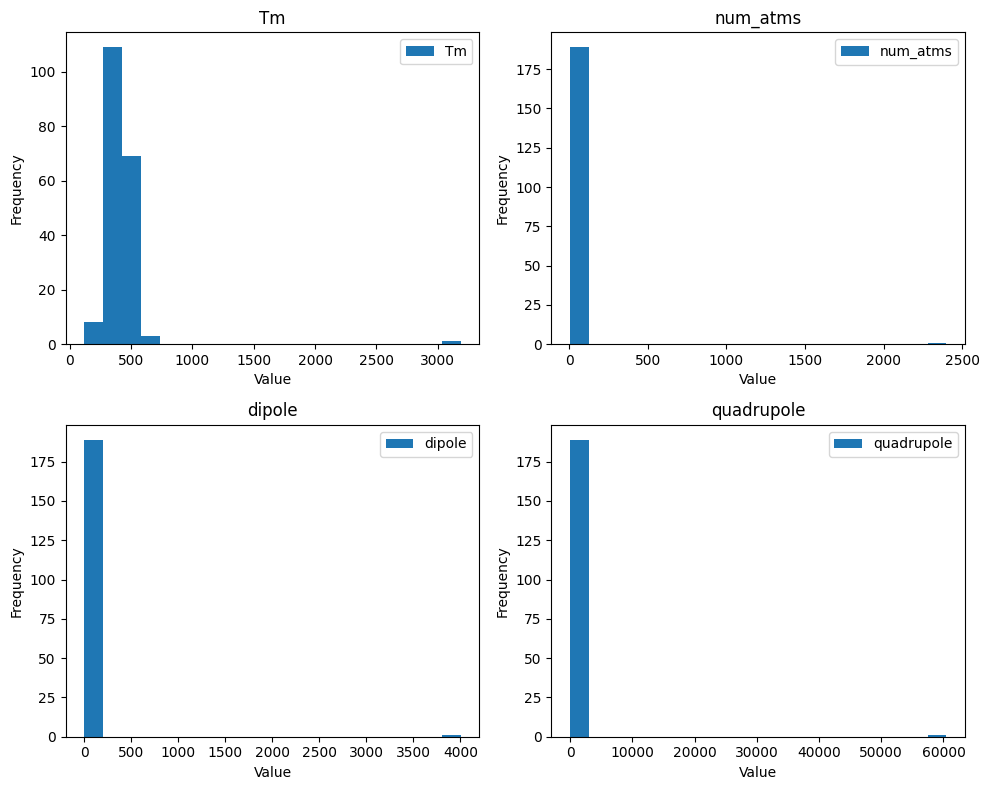

In [63]:
# Plot histograms of the columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histogram for each column
df_clean['Tm'].plot(kind='hist', bins=20, ax=axs[0, 0], legend=True)
axs[0, 0].set_title('Tm')

df_clean['num_atms'].plot(kind='hist', bins=20, ax=axs[0, 1], legend=True)
axs[0, 1].set_title('num_atms')

df_clean['dipole'].plot(kind='hist', bins=20, ax=axs[1, 0], legend=True)
axs[1, 0].set_title('dipole')

df_clean['quadrupole'].plot(kind='hist', bins=20, ax=axs[1, 1], legend=True)
axs[1, 1].set_title('quadrupole')

# Set labels for all plots
for ax in axs.flat:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [64]:
# Get statistics for continuous variables
stats = df_clean.describe()
print(stats)
# Compute the mean and standard deviation for 'Tm'
mean_tm = stats.loc['mean', 'Tm']
std_tm = stats.loc['std', 'Tm']

# Identify outliers: any value more than 3 standard deviations from the mean
outliers = df_clean[(df_clean['Tm'] < (mean_tm - 3*std_tm)) | (df_clean['Tm'] > (mean_tm + 3*std_tm))]

# Print SMILES strings of dropped molecules
print(outliers['smiles'])

# Drop the mislabeled molecules
df_clean = df_clean.drop(outliers.index)


                Tm     num_atms       dipole    quadrupole
count   190.000000   190.000000   190.000000    190.000000
mean    418.542263    39.273684    24.783521    335.060115
std     216.977513   172.461878   290.059172   4384.790542
min     119.150000     5.000000     0.000000      0.366284
25%     360.400000    20.000000     2.363634      8.845436
50%     405.650000    25.000000     3.575735     15.104636
75%     450.900000    31.000000     4.995532     22.105467
max    3186.500000  2400.000000  4001.832900  60456.931093
13    O=CC1=CC=CC=C1N1CCOCC1
Name: smiles, dtype: object


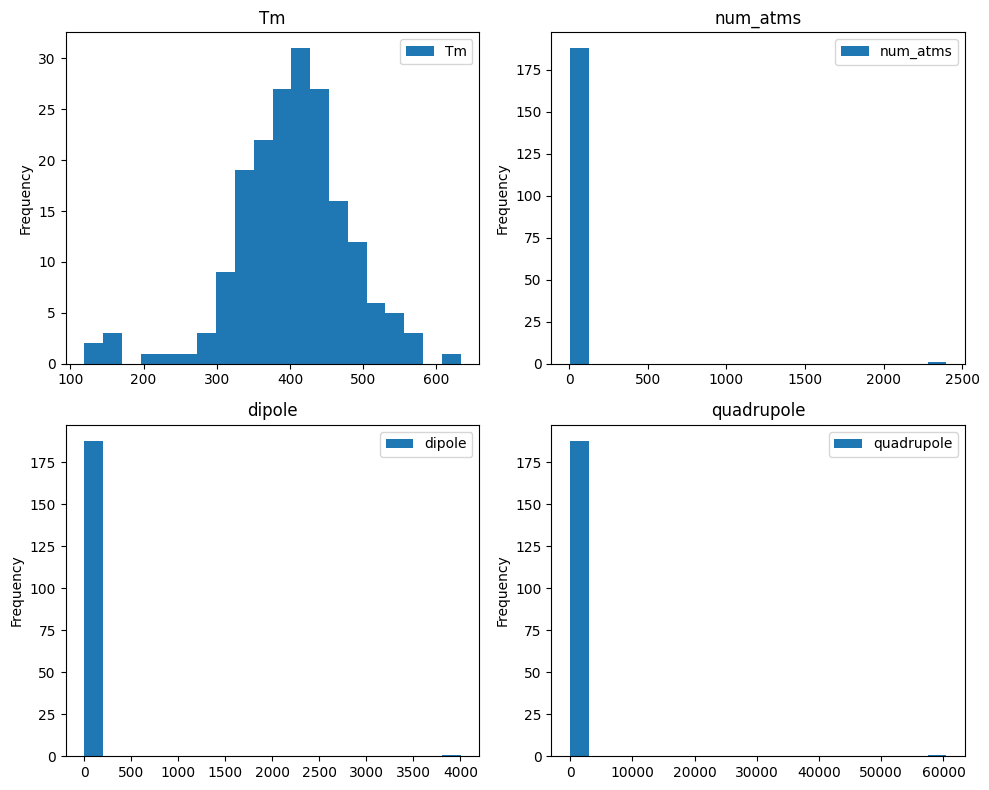

In [65]:
# Re-plot the histograms after removing mislabeled molecules
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histogram for each column
df_clean['Tm'].plot(kind='hist', bins=20, ax=axs[0, 0], legend=True)
axs[0, 0].set_title('Tm')

df_clean['num_atms'].plot(kind='hist', bins=20, ax=axs[0, 1], legend=True)
axs[0, 1].set_title('num_atms')

df_clean['dipole'].plot(kind='hist', bins=20, ax=axs[1, 0], legend=True)
axs[1, 0].set_title('dipole')

df_clean['quadrupole'].plot(kind='hist', bins=20, ax=axs[1, 1], legend=True)
axs[1, 1].set_title('quadrupole')
plt.tight_layout()
plt.show()


In [66]:
# Compute the correlation matrix for all numerical columns
correlation_matrix = df[['Tm', 'num_atms', 'dipole', 'quadrupole']].corr(method='pearson')

# Display the correlation matrix
print(correlation_matrix)


                  Tm  num_atms    dipole  quadrupole
Tm          1.000000  0.006327  0.007123   -0.025575
num_atms    0.006327  1.000000 -0.001304   -0.008449
dipole      0.007123 -0.001304  1.000000   -0.005300
quadrupole -0.025575 -0.008449 -0.005300    1.000000


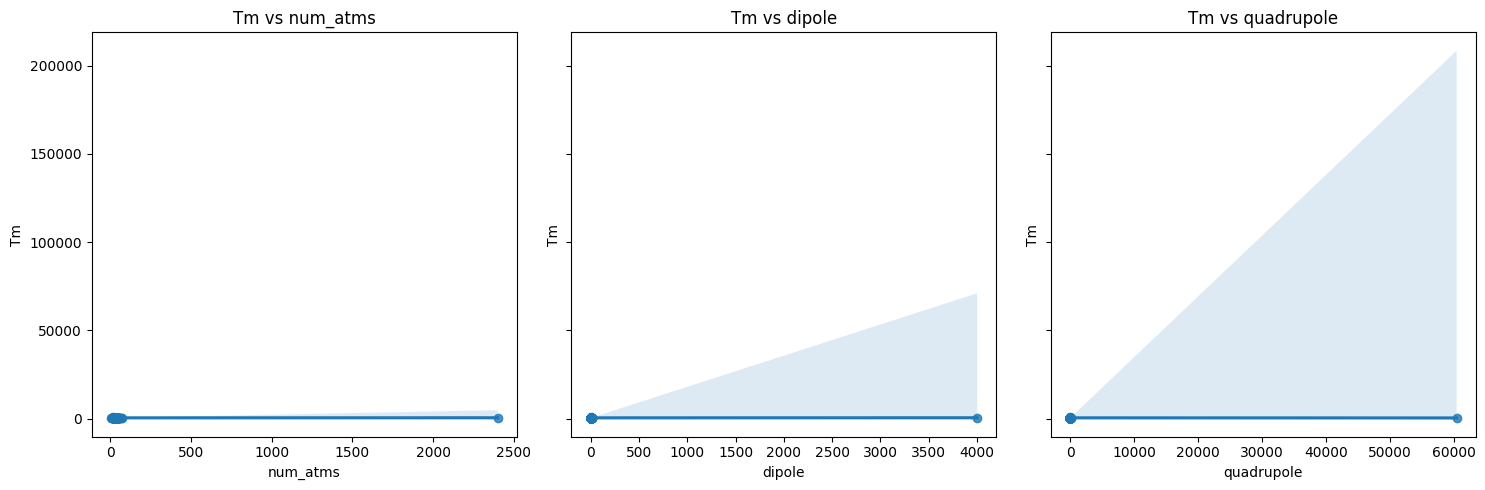

In [67]:
# Create a 1x3 grid of scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot Tm vs Number of Atoms
sns.regplot(x='num_atms', y='Tm', data=df_clean, ax=axs[0])
axs[0].set_title('Tm vs num_atms')

# Plot Tm vs Dipole
sns.regplot(x='dipole', y='Tm', data=df_clean, ax=axs[1])
axs[1].set_title('Tm vs dipole')

# Plot Tm vs Quadrupole
sns.regplot(x='quadrupole', y='Tm', data=df_clean, ax=axs[2])
axs[2].set_title('Tm vs quadrupole')

# Ensure all axes have the same range
plt.tight_layout()
plt.show()

                                       smiles      Tm  num_atms    dipole  \
12                                   CCCC(C)C  119.15      20.0  0.067055   
55                                         CF  130.15       5.0  1.700645   
100                                    CCCOCC  146.15      18.0  1.164088   
87                                 CCC(CC)C=C  146.15      21.0  0.386677   
38                                C=CCC1CCCC1  162.15      22.0  0.357670   
..                                        ...     ...       ...       ...   
116         NC1=CC=C(C=C1)C1=CC2=C(O1)C=CC=C2  555.15      27.0  3.102335   
92                  O=C1NC(=O)C2=C(S1)C=CC=C2  566.15      17.0  3.758503   
200  OC(=O)C1=CC(NC(=O)C2=CC=C(Br)C=C2)=CC=C1  580.15      29.0  3.733080   
9         NC1=C(C#N)C(=O)C2CC3=C(CN12)C=CC=C3  581.15      28.0  9.580572   
82                    NC1=NC2=C(N=CN2)C(=O)N1  633.15      16.0  6.488483   

     quadrupole  
12     0.366284  
55     5.380003  
100    3.246000  
87 

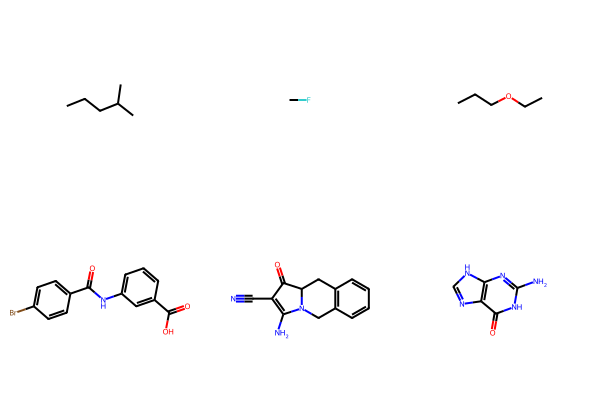

In [70]:
sorted_df = df_clean.sort_values(by='Tm')
print(sorted_df)
# Extract SMILES strings for the lowest and highest Tm molecules
lowest_Tm_smiles = sorted_df['smiles'].head(3).tolist()
highest_Tm_smiles = sorted_df['smiles'].tail(3).tolist()

# Generate molecule objects from SMILES
lowest_Tm_mols = [Chem.MolFromSmiles(smiles) for smiles in lowest_Tm_smiles]
highest_Tm_mols = [Chem.MolFromSmiles(smiles) for smiles in highest_Tm_smiles]
# Combine the lowest and highest Tm molecules into a single list
combined_mols = lowest_Tm_mols + highest_Tm_mols
# Plot the 2D structures for both lowest and highest Tm molecules
Draw.MolsToGridImage(combined_mols, molsPerRow=3)


In [69]:
from rdkit.Chem import rdMolDescriptors

# Example: Counting number of rings and heteroatoms (non-carbon atoms)
for mol in lowest_Tm_mols + highest_Tm_mols:
    num_rings = rdMolDescriptors.CalcNumRings(mol)
    num_heteroatoms = rdMolDescriptors.CalcNumHeteroatoms(mol)
    print(f"Rings: {num_rings}, Heteroatoms: {num_heteroatoms}")


Rings: 0, Heteroatoms: 0
Rings: 0, Heteroatoms: 1
Rings: 0, Heteroatoms: 1
Rings: 2, Heteroatoms: 5
Rings: 3, Heteroatoms: 4
Rings: 2, Heteroatoms: 6


In [16]:
# Difference Between Canonical and Isomeric SMILES
smiles_info = """
Difference Between Canonical and Isomeric SMILES:

Canonical SMILES:    These are unique representations of molecules where a specific ordering of atoms
                    is used to ensure the same molecule is always represented the same way, regardless
                    of how the structure is drawn or input.

Isomeric SMILES:     These include additional information about stereochemistry and isotopic atoms,
                    providing a more detailed and specific description of the molecule.


SELFIES (SELF-referencIng Embedded Strings): Unlike SMILES, which can fail for some molecules,
        SELFIES is a more robust encoding that ensures every string corresponds to a valid chemical
        structure. This reduces the possibility of generating invalid molecules from a string.
"""

print(smiles_info)



Difference Between Canonical and Isomeric SMILES:

Canonical SMILES:    These are unique representations of molecules where a specific ordering of atoms
                    is used to ensure the same molecule is always represented the same way, regardless
                    of how the structure is drawn or input.

Isomeric SMILES:     These include additional information about stereochemistry and isotopic atoms,
                    providing a more detailed and specific description of the molecule.


SELFIES (SELF-referencIng Embedded Strings): Unlike SMILES, which can fail for some molecules,
        SELFIES is a more robust encoding that ensures every string corresponds to a valid chemical
        structure. This reduces the possibility of generating invalid molecules from a string.

